# Final Project: Flight Price Prediction

According to statistics from the Bureau of Transportation, over 853 million passengers traveled through U.S. airports in 2022. In 2020, there were 388 million passengers traveling and in 2021, there were 658 million passengers. The number of travelers has been steadily increasing year by year as the global aviation industry has expanded and demand for tourism has accelerated. However, not everyone in the world can afford to fly because of the high cost of air travel. We hope to give potential passengers and airlines an idea of the market demand and price of air travel. 


In our project we will answer the question:
     Are we able to find the cheapest flight price given certain criteria for flights?

## Part 2: Directed Graph Network

In class, we used a graph network to explore the ways in which connections can be made socially, economoically, and through systems in the world. 

Travel shows just how connected the world really is. And we are focused on sharing that as well.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx 

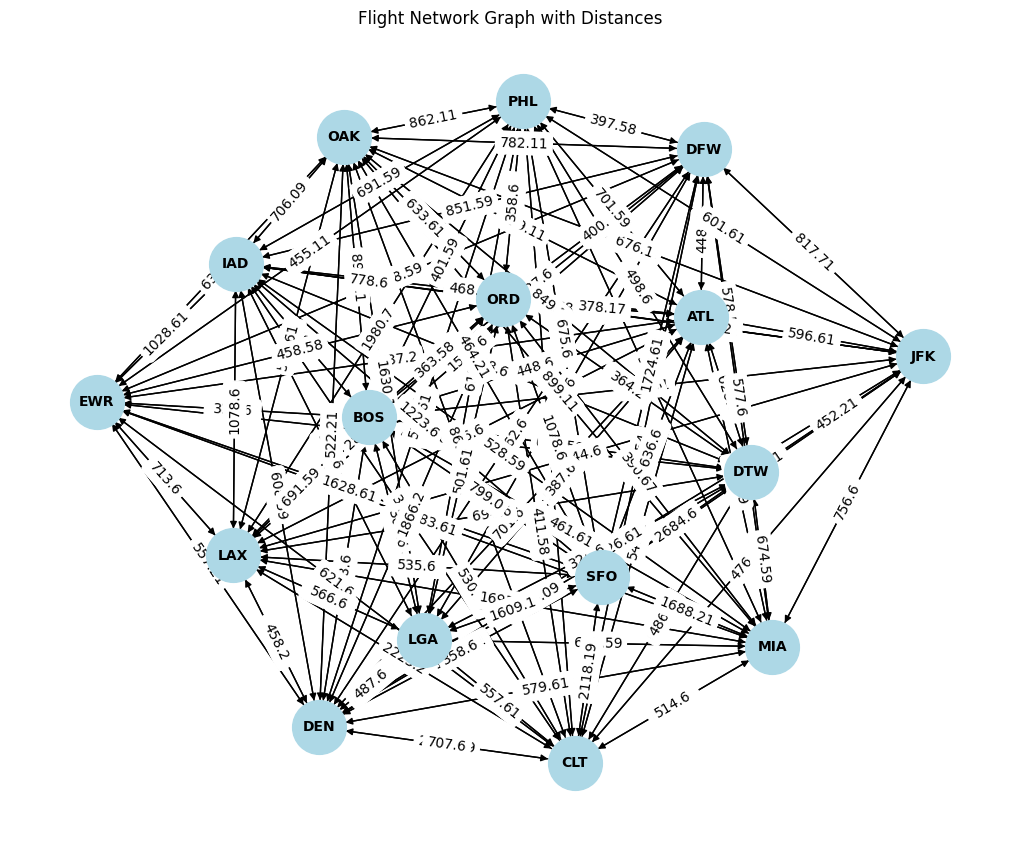

In [9]:
flight_price_dataset = pd.read_csv("C:/Users/Emily Shao/Desktop/archive/itineraries.csv")
week_analysis_df = flight_price_dataset[['segmentsAirlineCode', 'totalFare', 'flightDate', 'segmentsAirlineName']]

G = nx.DiGraph()

start_airports = flight_price_dataset['startingAirport'].unique()
stop_airports = flight_price_dataset['destinationAirport'].unique()

G.add_nodes_from(start_airports)
G.add_nodes_from(stop_airports)

for index, flight in flight_price_dataset.iterrows():
    st = flight['startingAirport']
    dest = flight['destinationAirport']
    fare = flight['totalFare']
    G.add_edge(st, dest, distance=fare)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Flight Network Graph with Distances')

plt.show()

In [12]:
plt.savefig(fname="C:/Users/Emily Shao/Desktop/FlightPricePredictor/Graphs/FlightNetworkGraph_withDistances.png")
print("Finished Saving")

Finished Saving


<Figure size 640x480 with 0 Axes>

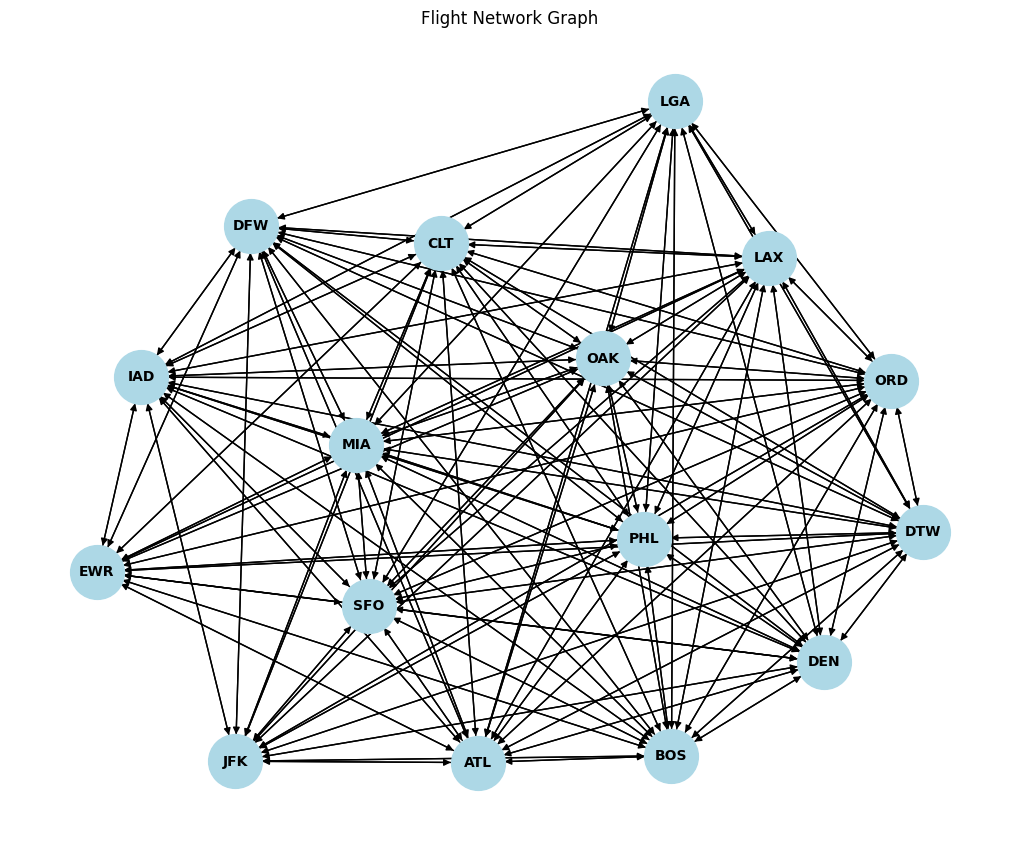

In [6]:
G_simple = nx.DiGraph()

G_simple.add_nodes_from(start_airports)
G_simple.add_nodes_from(stop_airports)

for index, flight in flight_price_dataset.iterrows():
    st = flight['startingAirport']
    dest = flight['destinationAirport']
    G_simple.add_edge(st, dest)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_simple)
nx.draw(G_simple, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')

plt.title('Flight Network Graph')

plt.show()

In [8]:
plt.savefig(fname="C:/Users/Emily Shao/Desktop/FlightPricePredictor/Graphs/FlightNetworkGraph_noDistances.png")
print("Finished Saving")

Finished Saving


<Figure size 640x480 with 0 Axes>

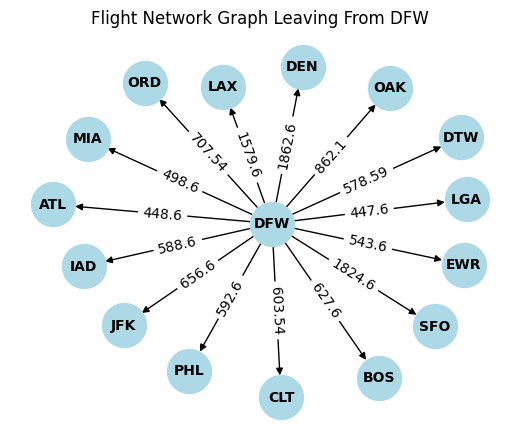

In [24]:
G_simple_one = nx.DiGraph()

G_simple_one.add_nodes_from(start_airports)
G_simple_one.add_nodes_from(stop_airports)

for index, flight in flight_price_dataset.iterrows():
    if flight['startingAirport'] == 'DFW':
        dest = flight['destinationAirport']
        fare = flight['totalFare']
        G_simple_one.add_edge('DFW', dest, distance=fare)

plt.figure(figsize=(5, 4))
pos = nx.spring_layout(G_simple_one)
nx.draw(G_simple_one, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, font_weight='bold')


labels = nx.get_edge_attributes(G_simple_one, 'distance')
nx.draw_networkx_edge_labels(G_simple_one, pos, edge_labels=labels)

plt.title('Flight Network Graph Leaving From DFW')
plt.show()

In [ ]:
plt.savefig(fname="C:/Users/Emily Shao/Desktop/FlightPricePredictor/Graphs/FlightNetworkGraph_leavingDFW.png")
print("Finished Saving")

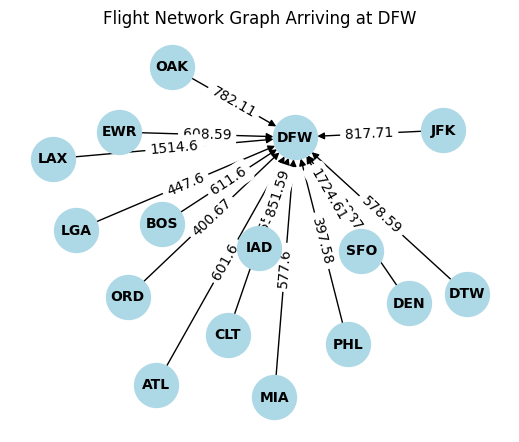

In [26]:
G_simple_arrive = nx.DiGraph()

G_simple_arrive.add_nodes_from(start_airports)
G_simple_arrive.add_nodes_from(stop_airports)

for index, flight in flight_price_dataset.iterrows():
    if flight['destinationAirport'] == 'DFW':
        st = flight['startingAirport']
        fare = flight['totalFare']
        G_simple_arrive.add_edge(st, 'DFW', distance=fare)

plt.figure(figsize=(5, 4))
pos = nx.spring_layout(G_simple_arrive)
nx.draw(G_simple_arrive, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, font_weight='bold')


labels = nx.get_edge_attributes(G_simple_arrive, 'distance')
nx.draw_networkx_edge_labels(G_simple_arrive, pos, edge_labels=labels)

plt.title('Flight Network Graph Arriving at DFW')
plt.show()

In [ ]:
plt.savefig(fname="C:/Users/Emily Shao/Desktop/FlightPricePredictor/Graphs/FlightNetworkGraph_arrivingDFW.png")
print("Finished Saving")